In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
import visuals as vs
%matplotlib inline

data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


/usr/local/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

In [ ]:
import time
import numpy as np
import pandas as pd

list = pd.Series(range(1, 100000000))

print(list.size)

start_time = time.time()
np.min(list)
np.max(list)
np.mean(list)
np.median(list)
np.std(list)
print("--- %s seconds ---" % (time.time() - start_time))


99999999


--- 5.57365083694458 seconds ---


In [37]:
import time
import numpy as np
import pandas as pd

list = pd.Series(range(1, 100000000))

print(list.size)

start_time = time.time()
list.min()
list.max()
list.mean()
list.median()
list.std()
print("--- %s seconds ---" % (time.time() - start_time))




99999999


--- 8.352056980133057 seconds ---


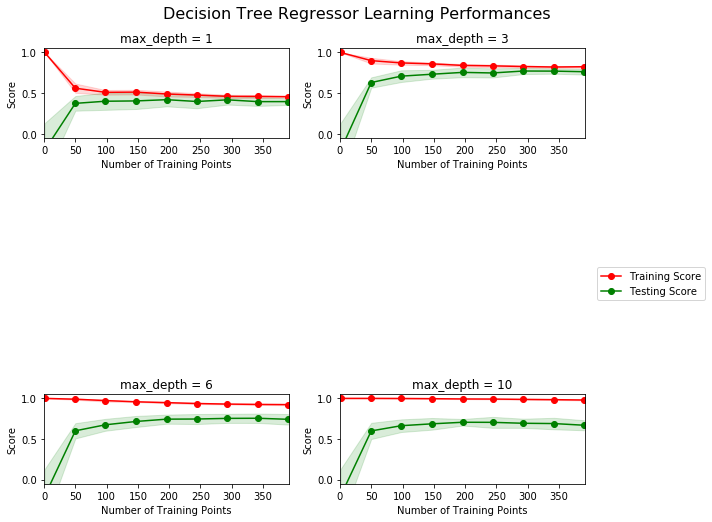

In [4]:
vs.ModelLearning(features, prices)

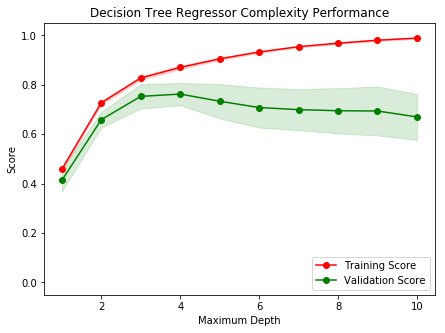

In [5]:
vs.ModelComplexity(X_train, y_train)

In [6]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
regressor = DecisionTreeRegressor()
params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
scoring_fnc = make_scorer(r2_score) 

grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets).fit(X_train, y_train)

reg = grid.best_estimator_
reg.get_params()

/usr/local/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [7]:
reg.predict([[5, 17, 15]])

array([403025.])